# Redes Neuronales Convolucionales

## Instalar Librerías

In [1]:
from keras.models import Sequential
from tensorflow.keras import Input

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np

## Crear la red

In [2]:
# Inicializo clasificador de CNN
clasificador = Sequential()

In [3]:
clasificador.add(Input(shape = (64,64,3)))

In [4]:
# Capa 1 - Primera capa convolucional
clasificador.add(
    Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        activation = "relu"
    )
)

In [5]:
# Capa 2 - 1er capa de pooling
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [6]:
# Capa 3 - 2da capa convolucional
clasificador.add(
    Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        activation = "relu"
    )
)

In [7]:
# Capa 4 - 2da capa de pooling
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [8]:
# Capa 5 - capa de flattening
clasificador.add(
    Flatten()
)

In [9]:
# Capa 6 - capa densa 
clasificador.add(
    Dense(
        units = 128,
        activation = "relu"
    )
)

In [10]:
# Capa 7 - capa de salida
clasificador.add(
    Dense(
        units = 1,
        activation = "sigmoid"
    )
)

In [11]:
# agregar compilador
clasificador.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

## Importar Imágenes

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2, # cezallamiento - cuanto se gira la imagen - hasta 0.2 radianes
    zoom_range = 0.2, # aplico zoom de hasta 20% en imágenes
    horizontal_flip = True # gira de forma aleatoria las fotos 90 grados
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [14]:
training_set = train_datagen.flow_from_directory(
    "dataset/training_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 8048 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(
    "dataset/test_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [16]:
images, labels = next(training_set)

In [17]:
images[0].shape

(64, 64, 3)

In [18]:
images[0]

array([[[0.38884658, 0.25017905, 0.10696889],
        [0.37119898, 0.24482135, 0.12056401],
        [0.369519  , 0.2468041 , 0.12963982],
        ...,
        [0.17077707, 0.15116923, 0.13940452],
        [0.1666583 , 0.14705046, 0.13528575],
        [0.16151838, 0.14191054, 0.13014582]],

       [[0.40783468, 0.27827764, 0.12669206],
        [0.41815692, 0.28653935, 0.1385495 ],
        [0.4349969 , 0.3028118 , 0.15585025],
        ...,
        [0.17995875, 0.1603509 , 0.1485862 ],
        [0.17640592, 0.15679808, 0.14503337],
        [0.15885071, 0.13924287, 0.12747817]],

       [[0.41811162, 0.28171268, 0.13291483],
        [0.4277505 , 0.28639922, 0.12793623],
        [0.42838156, 0.29124653, 0.12830743],
        ...,
        [0.18274239, 0.16404629, 0.14498751],
        [0.1768477 , 0.15723985, 0.14547515],
        [0.16127238, 0.14166453, 0.12989983]],

       ...,

       [[0.7432332 , 0.6385155 , 0.5517268 ],
        [0.739679  , 0.637533  , 0.5475658 ],
        [0.7471458 , 0

In [19]:
labels[1]

1.0

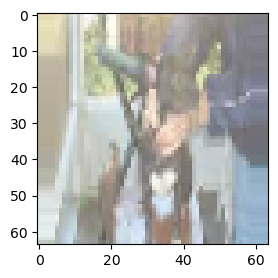

In [20]:
plt.figure(figsize = (3,3))
plt.imshow(images[1])
plt.show()

In [21]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
# X_train -> imagenes
# y_train -> etiquetas de las imagenes

## Entrenar al modelo

In [23]:
8048 / 32

251.5

In [24]:
2000 / 32

62.5

In [25]:
clasificador.fit(
    training_set,
    steps_per_epoch = 251,
    epochs = 25,    
    validation_data = test_set,
    validation_steps = 62 
)

Epoch 1/25


C:\Users\ignac\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 419ms/step - accuracy: 0.5806 - loss: 0.6665 - val_accuracy: 0.7006 - val_loss: 0.5740
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.6562 - loss: 0.6275 - val_accuracy: 0.8750 - val_loss: 0.4527
Epoch 3/25


C:\Users\ignac\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.6984 - loss: 0.5778 - val_accuracy: 0.7072 - val_loss: 0.5671
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.7500 - loss: 0.5892 - val_accuracy: 0.7500 - val_loss: 0.4861
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.7321 - loss: 0.5329 - val_accuracy: 0.7218 - val_loss: 0.5553
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.7500 - loss: 0.4706 - val_accuracy: 0.8125 - val_loss: 0.4169
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7493 - loss: 0.5087 - val_accuracy: 0.7671 - val_loss: 0.5039
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.6562 - loss: 0.7079 - val_accuracy: 0.8125 - val_loss: 0.3616
Epoch 9/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7762 - loss: 0.4757 - val_accuracy: 0.7626 - val_loss: 0.4942
Epoch 10/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.6250 - loss: 0.6479 - val_accu

## Validación de modelo

In [26]:
from tensorflow.keras.preprocessing import image

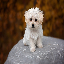

In [67]:
test_image = image.load_img("bichon-maltes.jpg", target_size = (64,64))
test_image

In [68]:
test_image = image.img_to_array(test_image)

In [69]:
test_image.shape

(64, 64, 3)

In [70]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [71]:
test_image = test_image / 255

In [76]:
resultado = clasificador.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [73]:
# gato -> 0
# perro -> 1
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [74]:
if resultado[0][0] > 0.5:
    print("Esto es un perro")
else:
    print("Esto es un gato")

Esto es un perro


In [75]:
resultado

array([[0.964798]], dtype=float32)